# Graphics

This file creates graphic outputs of descriptive statistics for each neighborhood and tract.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
master = pd.read_csv('../outputs/master.csv')
master

,id,date,available,price,room_type,minimum_nights,census_tract,census_NBH
0,3781,2023-03-19,f,125.0,Entire home/apt,32,512.0,East Boston
1,3781,2023-03-20,f,125.0,Entire home/apt,32,512.0,East Boston
2,3781,2023-03-21,f,125.0,Entire home/apt,32,512.0,East Boston
3,3781,2023-03-22,f,125.0,Entire home/apt,32,512.0,East Boston
4,3781,2023-03-23,f,125.0,Entire home/apt,32,512.0,East Boston
...,...,...,...,...,...,...,...,...
1410018,2021483,2024-03-13,f,500.0,Entire home/apt,1,608.0,South Boston
1410019,2021483,2024-03-14,f,500.0,Entire home/apt,1,608.0,South Boston
1410020,2021483,2024-03-15,f,500.0,Entire home/apt,1,608.0,South Boston
1410021,2021483,2024-03-16,f,500.0,Entire home/apt,1,608.0,South Boston


In [3]:
master_short = pd.read_csv('../outputs/master_short.csv')
master_short

,id,room_type,minimum_nights,census_tract,census_NBH,amenities,price
0,3781,Entire home/apt,32,512.00,East Boston,"[""Wifi"", ""Stove"", ""Kitchen"", ""Dishwasher"", ""Fr...",132.0
1,5506,Entire home/apt,3,814.00,Roxbury,"[""Wifi"", ""Keypad"", ""Free street parking"", ""Fir...",149.0
2,6695,Entire home/apt,3,814.00,Roxbury,"[""Wifi"", ""Stove"", ""Keypad"", ""Kitchen"", ""Dishwa...",179.0
3,8789,Entire home/apt,91,203.02,Beacon Hill,"[""Wifi"", ""Stove"", ""Kitchen"", ""Refrigerator"", ""...",90.0
4,4765070,Entire home/apt,3,812.00,Jamaica Plain,"[""Wifi"", ""Kitchen"", ""Window AC unit"", ""Free st...",98.0
...,...,...,...,...,...,...,...
3859,1956275,Entire home/apt,91,1201.05,Jamaica Plain,"[""Wifi"", ""TV with standard cable"", ""Carbon mon...",1299.0
3860,2000797,Private room,2,912.00,Dorchester,"[""Wifi"", ""City skyline view"", ""Kitchen"", ""Dish...",94.0
3861,2014651,Private room,91,1202.01,Jamaica Plain,"[""Wifi"", ""Stove"", ""Kitchen"", ""Dishwasher"", ""Fr...",120.0
3862,2014882,Private room,3,4.02,Brighton,"[""Wifi"", ""Keypad"", ""Free street parking"", ""Loc...",75.0


## Vacancy

In [4]:
master['date'] = pd.to_datetime(master['date'])

In [5]:
# select neighborhood

master_filt = master.loc[master['census_NBH'] == 'East Boston'].reset_index()

month_select = pd.to_datetime('2023-04')
master_filt = master_filt.loc[(master_filt['date'] >= month_select)
                                   & (master_filt['date'] < month_select + pd.DateOffset(months=1))]

master_filt['Availability'] = np.where(master_filt['available'] == 't', 'available', 'booked')

sum = master_filt['Availability'].value_counts().sum()
vac = master_filt['Availability'].value_counts()['available']

vac_rate = (vac / sum).round(2)
vac_rate

0.45

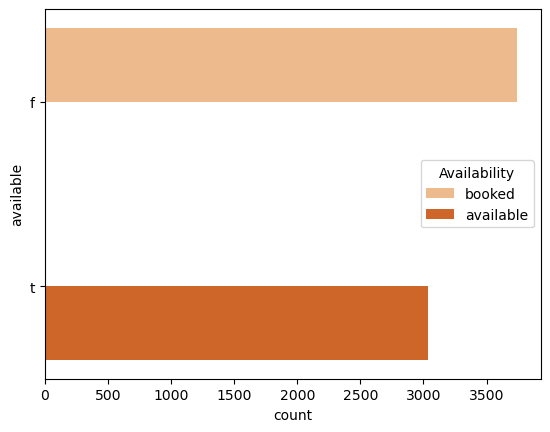

In [6]:
ax = sns.countplot(data = master_filt,
              y = 'available',
              hue = 'Availability',
              palette = 'Oranges')

sns.move_legend(ax, "center right")

In [7]:
# select tract

master_filt = master.loc[master['census_tract'] == 512].reset_index()

master_filt['vacant'] = np.where(master_filt['available'] == 't', 1, 0)      # 1 = vacant
                                                                             # 0 = booked

sum = master_filt['vacant'].value_counts().sum()
vac = master_filt['vacant'].value_counts()[1]

vac_rate = (vac / sum).round(2)
vac_rate

0.62

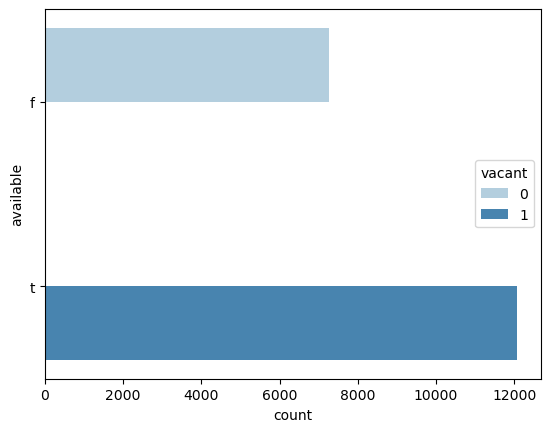

In [8]:
ax = sns.countplot(data = master_filt,
              y = 'available',
              hue = 'vacant',
              palette = 'Blues')

sns.move_legend(ax, "center right")

## Room Types

In [9]:
master_filt.dtypes

index                      int64
id                         int64
date              datetime64[ns]
available                 object
price                    float64
room_type                 object
minimum_nights             int64
census_tract             float64
census_NBH                object
vacant                     int32
dtype: object

In [10]:
month_select = pd.to_datetime('April 2023')
month_select


Timestamp('2023-04-01 00:00:00')

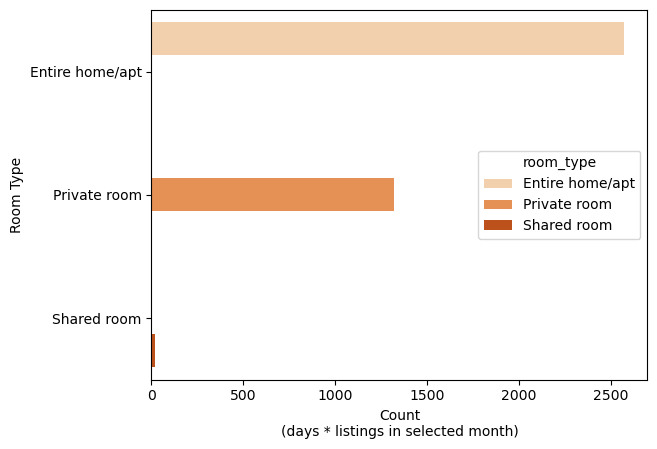

In [11]:
# select neighborhood
master_filt = master.loc[master['census_NBH'] == 'East Boston'].reset_index()

# select date
month_select = pd.to_datetime('2024-3')
master_filt = master_filt.loc[(master_filt['date'] >= month_select)
                                   & (master_filt['date'] < month_select + pd.DateOffset(months=1))]

# create room_type plot
ax = sns.countplot(data = master_filt,
                   y = 'room_type',
                   hue = 'room_type',
                   palette = 'Oranges')
ax.set_xlabel('Count\n(days * listings in selected month)')
ax.set_ylabel('Room Type')
sns.move_legend(ax, "center right")


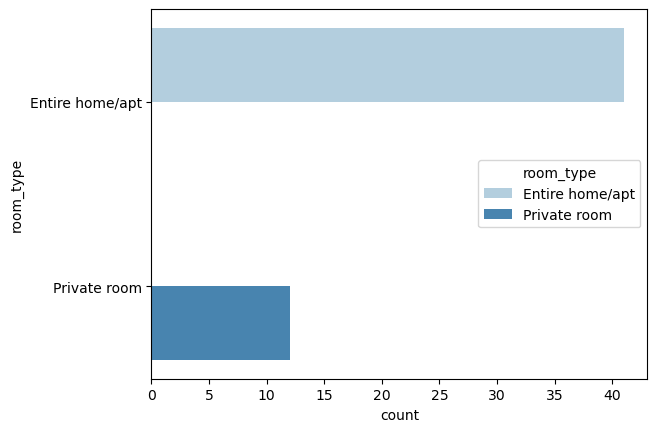

In [12]:
# select tract

master_short_filt = master_short.loc[master_short['census_tract'] == 512].reset_index()

ax = sns.countplot(data = master_short_filt,
                   y = 'room_type',
                   hue = 'room_type',
                   palette = 'Blues')

sns.move_legend(ax, "center right")

## Rental Length

In [13]:
master_filt

,index,id,date,available,price,room_type,minimum_nights,census_tract,census_NBH
348,348,3781,2024-03-01,f,150.0,Entire home/apt,32,512.0,East Boston
349,349,3781,2024-03-02,f,150.0,Entire home/apt,32,512.0,East Boston
350,350,3781,2024-03-03,f,125.0,Entire home/apt,32,512.0,East Boston
351,351,3781,2024-03-04,f,125.0,Entire home/apt,32,512.0,East Boston
352,352,3781,2024-03-05,f,125.0,Entire home/apt,32,512.0,East Boston
...,...,...,...,...,...,...,...,...,...
82485,1370597,50197218,2024-03-13,t,157.0,Entire home/apt,2,507.0,East Boston
82486,1370598,50197218,2024-03-14,t,157.0,Entire home/apt,2,507.0,East Boston
82487,1370599,50197218,2024-03-15,t,157.0,Entire home/apt,2,507.0,East Boston
82488,1370600,50197218,2024-03-16,t,157.0,Entire home/apt,2,507.0,East Boston


In [14]:
# select neighborhood

master_filt = master.loc[master['census_NBH'] == 'East Boston'].reset_index()
master_filt['rental_length'] = np.where(master_filt['minimum_nights'] < 28, 'short-term', 'long-term')

sum = master_filt['rental_length'].value_counts().sum()
short = master_filt['rental_length'].value_counts()['short-term']

short_term_percent = (short / sum).round(2)
short_term_percent

0.73

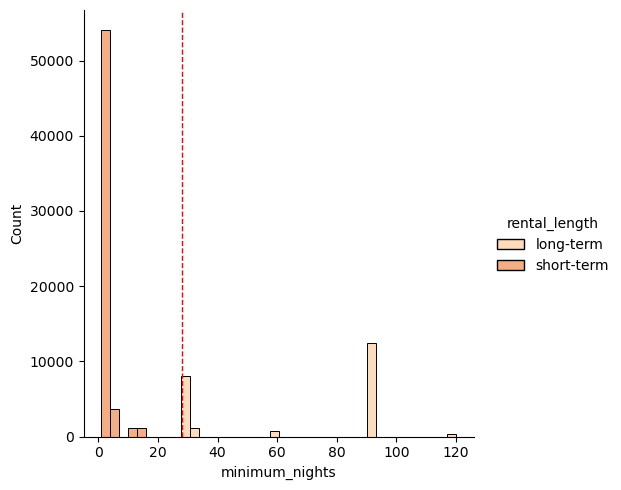

In [15]:
ax = sns.displot(data = master_filt,
                 x = 'minimum_nights',
                 kind = 'hist',
                 bins = 40,
                 hue = 'rental_length',
                 palette = 'Oranges')

ax.refline(x = 28,
           color = "red",
           lw = 1)

sns.move_legend(ax, "center right")

In [16]:
# select tract

master_filt = master.loc[master['census_tract'] == 512].reset_index()
master_filt['rental_length'] = np.where(master_filt['minimum_nights'] < 28, 'short-term', 'long-term')

sum = master_filt['rental_length'].value_counts().sum()
short = master_filt['rental_length'].value_counts()['short-term']

short_term_percent = (short / sum).round(2)
short_term_percent

0.77

In [17]:
master_filt

,index,id,date,available,price,room_type,minimum_nights,census_tract,census_NBH,rental_length
0,0,3781,2023-03-19,f,125.0,Entire home/apt,32,512.0,East Boston,long-term
1,1,3781,2023-03-20,f,125.0,Entire home/apt,32,512.0,East Boston,long-term
2,2,3781,2023-03-21,f,125.0,Entire home/apt,32,512.0,East Boston,long-term
3,3,3781,2023-03-22,f,125.0,Entire home/apt,32,512.0,East Boston,long-term
4,4,3781,2023-03-23,f,125.0,Entire home/apt,32,512.0,East Boston,long-term
...,...,...,...,...,...,...,...,...,...,...
19340,1366947,50085332,2024-03-13,f,536.0,Entire home/apt,1,512.0,East Boston,short-term
19341,1366948,50085332,2024-03-14,f,536.0,Entire home/apt,1,512.0,East Boston,short-term
19342,1366949,50085332,2024-03-15,f,536.0,Entire home/apt,1,512.0,East Boston,short-term
19343,1366950,50085332,2024-03-16,f,536.0,Entire home/apt,1,512.0,East Boston,short-term


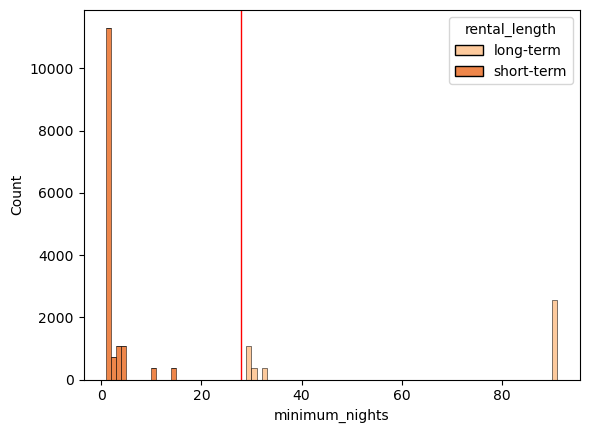

In [18]:
# Define bins
bins = [i for i in range(1, master_filt['minimum_nights'].max() + 1)]

# Create plot
fig3, ax = plt.subplots()
sns.histplot(data=master_filt, x='minimum_nights', hue='rental_length', palette='Oranges', ax=ax, bins=bins, multiple="stack")

# Add vertical line
ax.axvline(x=28, color='red', lw=1)

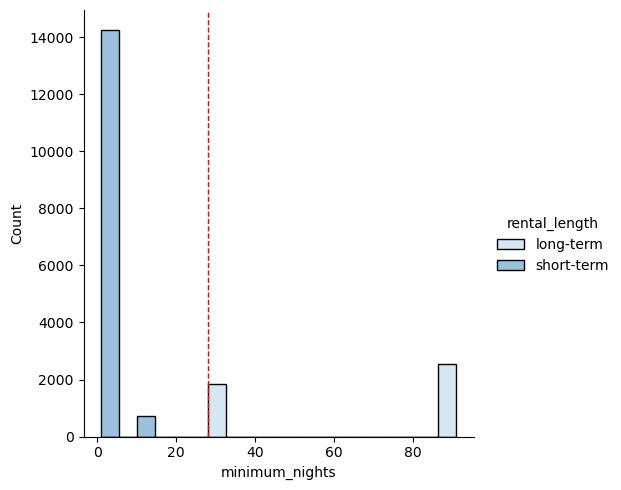

In [19]:
ax = sns.displot(data = master_filt,
                 x = 'minimum_nights',
                 kind = 'hist',
                 bins = 20,
                 hue = 'rental_length',
                 palette = 'Blues')

ax.refline(x = 28,
           color = "red",
           lw = 1)

sns.move_legend(ax, "center right")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


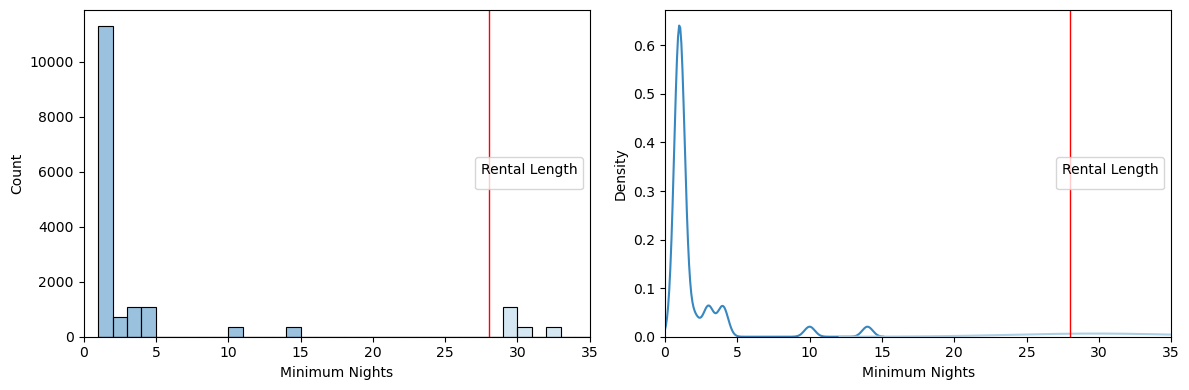

In [20]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 4))
# create histogram
sns.histplot(data=master_filt, x='minimum_nights', bins=range(1,36), hue='rental_length', ax=axes[0], palette='Blues')
axes[0].set_xlim(0, 35)
axes[0].set_xlabel('Minimum Nights')
axes[0].set_ylabel('Count')
axes[0].legend(title='Rental Length', loc='center right')

# add red line
axes[0].axvline(x=28, color='red', linewidth=1)

# create density plot
sns.kdeplot(data=master_filt, x='minimum_nights', hue='rental_length', ax=axes[1], palette='Blues')
axes[1].set_xlim(0, 35)
axes[1].set_xlabel('Minimum Nights')
axes[1].set_ylabel('Density')
axes[1].legend(title='Rental Length', loc='center right')

# add red line
axes[1].axvline(x=28, color='red', linewidth=1)

plt.tight_layout()